## 📌 Notebook 1: Logistic Regression (Binary Classification)

### Handwritten Digit Recognition with Logistic Regression

This notebook introduces the first step in our learning journey: a linear binary classifier. We build **logistic regression from scratch** using PyTorch tensors to distinguish between two MNIST digits (e.g. 0 vs 1).

**Key Goals**
- Implement weights, bias, and sigmoid activation manually
- Train using binary cross-entropy loss and gradient descent
- Track training and validation accuracy and loss
- Evaluate the model using a confusion matrix

**Expected Takeaway**  
Gain a foundational understanding of how gradient-based learning works on a simple binary task.


### Loading our data 
 We will use MNIST Dataset

In [2]:
import os
import sys
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
sys.path.append(project_root)
import importlib
import src.plots 
import src.utils
importlib.reload(src.plots)



/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/qattan/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` 

<module 'src.plots' from '/Users/mac/Studying/Machine learning/Digit_recognition_evolution/linear_classifier/src/plots.py'>

In [3]:

from src.utils import load_transform_split_mnist , count_classes , check_device
from src.plots import  show_samples

train_loader,val_loader,test_loader , train_size,val_size, test_size = load_transform_split_mnist()

**let's show some samples**

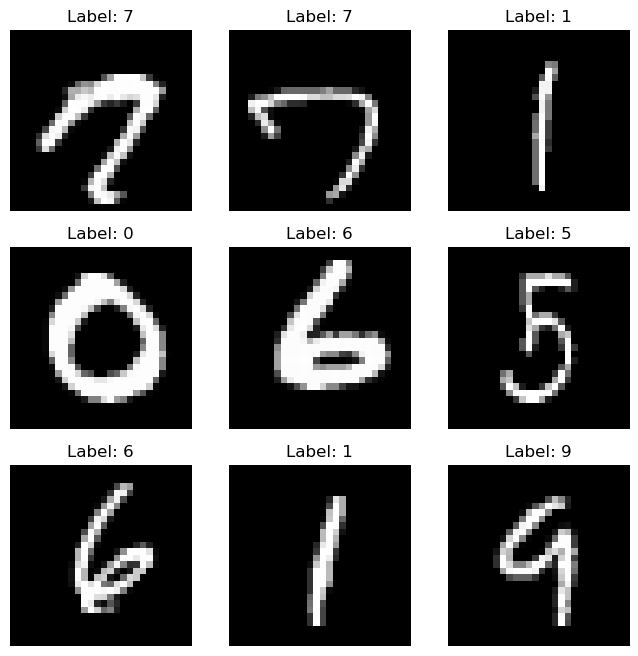

In [4]:
importlib.reload(src.plots)
show_samples(train_loader)

**checking balance**

In [5]:
# first we check on our device for function necessties
check_device()

from importlib import reload
import src.utils as utils

reload(utils)

counts = utils.count_classes(train_loader)
counts = {int(k): v for k, v in counts.items()}
print(counts)


Using Apple Silicon MPS GPU
Device: mps
{1: 5394, 3: 4905, 6: 4734, 8: 4681, 5: 4337, 7: 5012, 0: 4738, 4: 4674, 9: 4759, 2: 4766}


Our  data is not no skewed significantly 

now we explore the data shape


In [ ]:
images, labels = next(iter(train_loader))

print("="*50)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("="*50)
print(images.min().item(), images.max().item())


Images shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
0.0 1.0


In [ ]:
images.shape


torch.Size([64, 1, 28, 28])